<a href="https://colab.research.google.com/github/marino1846067/CMP2021/blob/main/5_AnimatedPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANIMATED PLOTS WITH `matplotlib`

## Warming up
In this example we plot a few different functions and include labels and legend.

The colors are assigned automatically. You can also specify the color by using the proper parameter. See `help(plt.plot)` or visit to [matplotlib.pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) for details.

Note how plotting a function consists in sampling the $x$ axis in an interval and then plotting the function for each point. The number of samples will determine how smooth the curve will be.

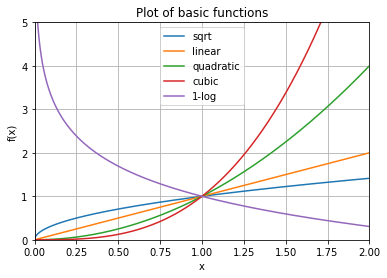

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math

# See what happens when reducing the number of samples to 10
x = np.linspace(0.001, 2, 100000)

plt.xlabel('x')
plt.ylabel('f(x)')

plt.title("Plot of basic functions")

plt.plot(x, np.sqrt(x), label='sqrt')
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
# See what happens when the following curve is not plotted
plt.plot(x, 1-np.log(x), label='1-log')

plt.xlim(0., 2.)
plt.ylim(0., 5.)
plt.grid(True)
plt.legend()

plt.show()

## Ready to go!
We are finally ready to complete the exercise of the projectile trajectory by animating the plot.

The main difference is that instead of a simple `plt.plot(...)` command, we need to interact with the elements forming a plot. To understand the internals of the plot object take a look at this [matplotlib FAQ](https://matplotlib.org/faq/usage_faq.html).

We use the simple version of the example with all values fixed and focus on the plotting part.

First we load the `animation` module from `matplotlib`.

In [ ]:
#%matplotlib inline does not behave well with animate on my machine
#%matplotlib notebook does, but it does not work smoothly with colab...
#We stick to inline, and take an additional step on colab to make things work

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# All the rest here should be familiar by now...
g = 9.8
h = 10.
theta = np.deg2rad(30)
v0 = 30.
dt = 0.1
x0 = 0
y0 = h

v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
print("v0_x: %.1f m/s \t v0_y: %.1f m/s" % (v0x,v0y))

def x(t):
    return x0 + v0x*t

def y(t):
    return y0 + v0y*t - 0.5*g*t*t

times = np.arange(0., 1000., dt)

xi = [x(t) for t in times if y(t)>=0.]
yi = [y(t) for t in times if y(t)>=0.]

pos = np.array([[x(t),y(t)] for t in times if y(t)>=0.])

# print("positions [x y]:\n", pos)

v0_x: 26.0 m/s 	 v0_y: 15.0 m/s


Next, we replace [`plt.plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) with the two separate statements: here is a static version of the plot we want to animate.

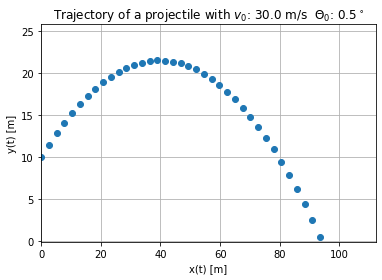

In [ ]:
# Create a figure object
fig = plt.figure()

# Add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(xi)*1.2), ylim=(-0.1,max(yi)*1.2))
ax.grid()
ax.set_xlabel("x(t) [m]")
ax.set_ylabel("y(t) [m]")
plt.title("Trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$" % (v0,theta))

# Try: '--', 'x', '.', 'o'
ax.plot(pos[:,0], pos[:,1], 'o', lw=2)

plt.show()

In this example we have used the `subplot` function. In principle a figure can now contain multiple plots and
`ax.plot()` returns a list of objects, even if it contains only one object ([matplotlib.axes.Axes.plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.axes.Axes.plot.html)).

Now we use the [`FuncAnimation`](https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html) to animate the plot. The process consists in 3 steps.
1. Plot the initial state of the plot. In our case we plot the initial positions `xi[0]` and `yi[0]`.
1. Define a function to call at each frame; it takes an argument and is called to update the info being displayed on the plot.
1. Call the `FuncAnimation` function that updates the figure by calling the function of point 2. a number of times
  - `FuncAnimation` has  a number of useful options such as whether to repeat the animation, change the frame rate, introduce a delay between repetitions, etc.

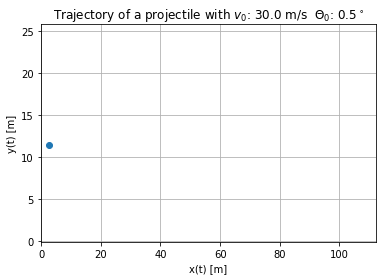

In [ ]:
# Create a figure object
fig = plt.figure()

# Add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(xi)*1.2), ylim=(-0.1,max(yi)*1.2))
ax.grid()
ax.set_xlabel('x(t) [m]')
ax.set_ylabel("y(t) [m]")
plt.title("Trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$" % (v0,theta))

# 1. Plot the initial state of the plot
line = ax.plot(xi[0], yi[0], 'o', lw=2)

# 2. Define an "update_plots" function to call at each frame.
# Each call to animate with argument i modifies the line[0] object which is the plot being shown.
# In our case we use i to draw the i-th position.
def update_plots(i):
    # Draw the i-th position
    line[0].set_data(xi[i], yi[i])
    # Return a tuple
    return line[0],

# 3. Call the FuncAnimation function to redraw the 'fig' object using the 'update_plots' function with argument 
# which is an int given by np.arange(1, len(xi))
ani = animation.FuncAnimation(fig, update_plots, np.arange(1, len(xi)), interval=50, blit=True, repeat=True)

# With %matplotlib notebook, the following line is enough on my machine
# Here we only get the first frame, so we do something additional in the next cell
plt.show()

In [ ]:
# Here is the rendering that makes it work on Colab
from matplotlib import rc
rc('animation', html='html5')
ani

### The whole code in a single cell

v0_x: 26.0 m/s 	 v0_y: 15.0 m/s
max height: 21.48 at x = 38.97


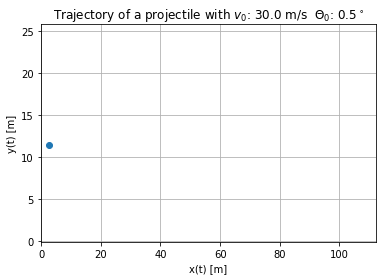

In [ ]:
#%matplotlib inline does not behave well with animate on my machine
#%matplotlib notebook does, but it does not work smoothly with colab...
#We stick to inline, and take an additional step on colab to make things work
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# All the rest here should be familiar by now...
g = 9.8
h = 10.
theta = np.deg2rad(30)
v0 = 30.
dt = 0.1
x0 = 0
y0 = h

v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
print("v0_x: %.1f m/s \t v0_y: %.1f m/s"%(v0x,v0y))

def x(t):
    return x0 + v0x*t

def y(t):
    return y0 + v0y*t - 0.5*g*t*t

times = np.arange(0., 1000., dt)

xi = [x(t) for t in times if y(t)>=0.]
yi = [y(t) for t in times if y(t)>=0.]

pos = np.array([[x(t),y(t)] for t in times if y(t)>=0.])

print("max height: %.2f at x = %.2f" % (max(yi), xi[yi.index(max(yi))]))

# Create a figure object
fig = plt.figure()

# Add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(xi)*1.2), ylim=(-0.1,max(yi)*1.2))
ax.grid()
ax.set_xlabel('x(t) [m]')
ax.set_ylabel("y(t) [m]")
plt.title("Trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$" % (v0,theta))

# 1. Plot the initial state of the plot
line = ax.plot(xi[0], yi[0], 'o', lw=2)

# 2. Define an "update_plots" function to call at each frame.
# Each call to animate with argument i modifies the line[0] object which is the plot being shown.
# In our case we use i to draw the i-th position.
def update_plots(i):
    # Draw the i-th position
    line[0].set_data(xi[i], yi[i])
    # Return a tuple
    return line[0],

# 3. Call the FuncAnimation function to redraw the 'fig' object using the 'update_plots' function with argument 
# which is an int given by np.arange(1, len(xi))
ani = animation.FuncAnimation(fig, update_plots, np.arange(1, len(xi)), interval=50, blit=True, repeat=True)

# With %matplotlib notebook, the following line is enough on my machine
# Here we only get the first frame, so we do something additional in the next cell
plt.show()

# Here is the rendering that makes it work on Colab
from matplotlib import rc
rc('animation', html='html5')
ani

If you would like to keep the trajectory in the figure, you simply have to specify to plot all the point up to $i$-th position by using **slicing**. 

Change `xi[i]` to `xi[:i]` in `update_plots(i)` to see this!

### Now let's plot the projectile and the trajectory

v0_x: 26.0 m/s 	 v0_y: 15.0 m/s
max height: 21.48 at x = 38.97


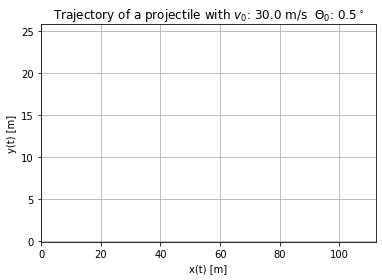

In [ ]:
#%matplotlib inline does not behave well with animate on my machine
#%matplotlib notebook does, but it does not work smoothly with colab...
#We stick to inline, and take an additional step on colab to make things work

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# All the rest here should be familiar by now...
g = 9.8
h = 10.
theta = np.deg2rad(30)
v0 = 30.
dt = 0.1
x0 = 0
y0 = h

v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
print("v0_x: %.1f m/s \t v0_y: %.1f m/s"%(v0x,v0y))

def x(t):
    return x0 + v0x*t

def y(t):
    return y0 + v0y*t - 0.5*g*t*t

times = np.arange(0., 1000., dt)

xi = [x(t) for t in times if y(t)>=0.]
yi = [y(t) for t in times if y(t)>=0.]

pos = np.array([[x(t),y(t)] for t in times if y(t)>=0.])

print("max height: %.2f at x = %.2f" % (max(yi), xi[yi.index(max(yi))]))

# Create a figure object
fig = plt.figure()

# Add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(xi)*1.2), ylim=(-0.1,max(yi)*1.2))
ax.grid()
ax.set_xlabel("x(t) [m]")
ax.set_ylabel("y(t) [m]")
plt.title("Trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$" % (v0,theta))

# 1. Plot the initial state of the plot
line = ax.plot(xi[0], yi[0], '--', lw=1)
ball = ax.plot([], [], 'o-', lw=2, color='red')

In [ ]:
# line is a list of objects (initially there is no line to show, with just one point)
print(type(line))
print(line)
print(len(line))

# As is ball (initially there is no ball to show: ball was called with arguments [], [])
print(type(ball))
print(ball)
print(len(ball))

<class 'list'>
1
<class 'list'>
1


We can use the `_` variable to use just the object contained in the list

In [ ]:
# 1. Plot the initial state of the plot
line, *_ = ax.plot(xi[0], yi[0], '--', lw=1)
ball, *_ = ax.plot([], [], 'o-', lw=2, color='red')

In [ ]:
# line is now that first object in the list we had previously called line
print(type(line))
print(line)

# ball is now that first object in the list we had previously called ball
print(type(ball))
print(ball)

<class 'matplotlib.lines.Line2D'>
Line2D(_line2)
<class 'matplotlib.lines.Line2D'>
Line2D(_line3)


Now we can define the function that can be called a number of times to update what needs to be shown

In [ ]:
def update_plots(i):
    # Draw the line from 0th -> i-th position
    line.set_data(xi[:i], yi[:i])
    # Draw the ball ONLY at the i-th position
    ball.set_data(xi[i], yi[i])
    # Return a tuple
    return line, ball

# 3. Call the FuncAnimation function to redraw the 'fig' object using the 'update_plots' function with argument 
# which is an int given by np.arange(1, len(xi))
ani = animation.FuncAnimation(fig, update_plots, np.arange(1, len(xi)), interval=50, blit=True, repeat=True)

# With %matplotlib notebook, the following line is enough on my machine
# Here we only get the first frame, so we do something additional in the next cell
plt.show()

# Here is the rebdering that makes it work on Colab
from matplotlib import rc
rc('animation', html='html5')
ani

## Adding legend and info
Finally we add some useful info on the plot to report the time and the position.

We do this by defining a template text for what we want to show and its format. The actual data is updated in the animate function `update_plots` as with the positions.

v0_x: 26.0 m/s 	 v0_y: 15.0 m/s
max height: 21.48 at x = 39.75


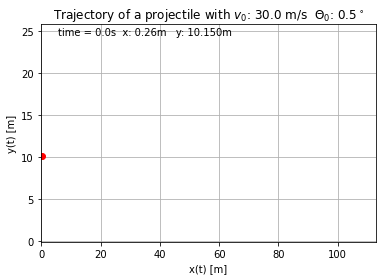

In [ ]:
#%matplotlib inline does not behave well with animate on my machine
#%matplotlib notebook does, but it does not work smoothly with colab...
#We stick to inline, and take an additional step on colab to make things work
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# All the rest here should be familiar by now...
g = 9.8
h = 10.
theta = np.deg2rad(30)
v0 = 30.
dt = 0.01
x0 = 0
y0 = h

v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)
print("v0_x: %.1f m/s \t v0_y: %.1f m/s"%(v0x,v0y))

def x(t):
    return x0 + v0x*t

def y(t):
    return y0 + v0y*t - 0.5*g*t*t

times = np.arange(0., 1000., dt)

xi = [x(t) for t in times if y(t)>=0.]
yi = [y(t) for t in times if y(t)>=0.]

pos = np.array([[x(t),y(t)] for t in times if y(t)>=0.])

print("max height: %.2f at x = %.2f" % (max(yi), xi[yi.index(max(yi))]))

# Create a figure object
fig = plt.figure()

# Add subplot (just 1) and set x and y limits based on data
# ax is the object containing objects to be plotted
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1, max(xi)*1.2), ylim=(-0.1,max(yi)*1.2))
ax.grid()
ax.set_xlabel("x(t) [m]")
ax.set_ylabel("y(t) [m]")
plt.title("Trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$" % (v0,theta))

# 1. Plot the initial state of the plot
#line, *_ = ax.plot(xi[0], yi[0], '--', lw=1)
line, *_ = ax.plot(xi[0], yi[0], lw=1)
ball, *_ = ax.plot([], [], 'o-', lw=2, color='red')


# Define a template info box to be shown
info_template = 'time = %.1fs  x: %.2fm   y: %.3fm'
info_text = ax.text(0.05, 0.95, '', transform=ax.transAxes)

# Define the 'update_plots' function to animate the frames
# At each step we do 3 things
# 1) draw the line from 0 -> i-th position
# 2) draw the point at i-th position
# 3) update the text box with the time and position at i-th position

def update_plots(i):
    line.set_data(xi[:i], yi[:i])
    ball.set_data(xi[i], yi[i])
    # Provide the numerical data to info_template to form an actual string
    info_text.set_text(info_template % (times[i], xi[i],yi[i]))
    # Return a tuple
    return line, ball, info_text

# 3. Call the FuncAnimation function to redraw the 'fig' object using the 'update_plots' function with argument 
# which is an int given by np.arange(1, len(xi))
#ani = animation.FuncAnimation(fig, animate, np.arange(1, len(xi)), interval=1, blit=True, repeat_delay=1000)
ani = animation.FuncAnimation(fig, update_plots, np.arange(1, len(xi)), interval=10, blit=True, repeat=False)

plt.title("Trajectory of a projectile with $v_0$: %.1f m/s\t $\Theta_0$: %.1f$^\circ$" % (v0,theta))

# With %matplotlib notebook, the following line is enough on my machine
# Here we only get the first frame, so we do something additional in the next cell
plt.show()

# Here is the rebdering that makes it work on Colab
from matplotlib import rc
rc('animation', html='html5')
ani

## Exercises you can practice with
- Write position *x* of the max height and put an arrow pointing to the apex
- Write the value of *x* and *y* on the plot near the actual position in real time
- Add a slider to modify the value of some parameters interactively
- Create an animated histogram for a Gaussian distribution
- Extend the problem to 3D and use 3D plot to show the trajectory in space using [mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
- Plot the motion of a body $m$ that at a time $t$ (extracted randomly) splits in 2 bodys of mass $m_1$ and $m_2$ ($m_1 + m_2 = m$)
- Plot the motion of a particle of mass $M$ and lifetime $\tau$ that decays at a time $t$ (extracted from an exponential) to two lighter particles. For example use $B^0 \rightarrow K^+ \pi^-$

## Additional material
- Take a look at this very nice example of the animation of a [double pendulum](https://matplotlib.org/gallery/animation/double_pendulum_sgskip.html)